# RNN (Recurrent Neural Network) 
- 레퍼런스 
- https://github.com/gilbutITbook/080328/blob/main/7.2.%20seoul-120-baseline-rnn.ipynb

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, GRU, Bidirectional, LSTM, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [2]:
df = pd.read_csv('./data/다산콜재단.csv')
df

,번호,분류,제목,내용,내용번호,문서
0,2645,복지,아빠 육아휴직 장려금,아빠 육아휴직 장려금 업무개요 남성근로자의 육아휴직을 장려하고 양육에 따른 경...,23522464,아빠 육아휴직 장려금아빠 육아휴직 장려금 업무개요 남성근로자의 육아휴직을 장려...
1,2644,경제,[서울산업진흥원] 서울메이드란?,서울산업진흥원 서울메이드란 서울의 감성을 담은 다양하고 새로운 경험을 제공하기 위해...,23194045,[서울산업진흥원] 서울메이드란?서울산업진흥원 서울메이드란 서울의 감성을 담은 다양하...
2,2642,복지,"광진맘택시 운영(임산부,영아 양육가정 전용 택시)",광진맘택시 운영임산부영아 양육가정 전용 택시 업무개요 교통약자인 임산부와 영아가정...,22904492,"광진맘택시 운영(임산부,영아 양육가정 전용 택시)광진맘택시 운영임산부영아 양육가정 ..."
3,2641,복지,마포 뇌병변장애인 비전센터,마포 뇌병변장애인 비전센터 마포뇌병변장애인 비전센터 운영 구분 내용 목적 학...,22477798,마포 뇌병변장애인 비전센터마포 뇌병변장애인 비전센터 마포뇌병변장애인 비전센터 운영 ...
4,2640,행정,2021년도 중1·고1 신입생 입학준비금 지원,년도 중고 신입생 입학준비금 지원 업무개요 서울시는 전국 최초로 년도부터 개 자...,22227896,2021년도 중1·고1 신입생 입학준비금 지원년도 중고 신입생 입학준비금 지원 업...
...,...,...,...,...,...,...
2133,12,경제,농산물소득분석 자료를 열람하고자 하는데 가능한가요?,농산물소득분석 자료를 열람하고자 하는데 가능한가요 예 가능하십니다 농촌진흥청 ...,2896820,농산물소득분석 자료를 열람하고자 하는데 가능한가요?농산물소득분석 자료를 열람하고자 ...
2134,8,행정,제가 휠체어를 사용하여야 하는 장애인인데 교육원에서 교육을 받을 수 있나요?,제가 휠체어를 사용하여야 하는 장애인인데 교육원에서 교육을 받을 수 있나요 우리교...,2894409,제가 휠체어를 사용하여야 하는 장애인인데 교육원에서 교육을 받을 수 있나요?제가 휠...
2135,7,행정,투자심사위원회는 어떻게 구성되어 있습니까?,투자심사위원회는 어떻게 구성되어 있습니까지방재정법시행령 제조항의 규정에 의한 서울특...,2898595,투자심사위원회는 어떻게 구성되어 있습니까?투자심사위원회는 어떻게 구성되어 있습니까지...
2136,6,행정,홈페이지를 구축해서 운영을 하려고 하는데 서버를 어떻게 사용할 수 있나요?,홈페이지를 구축해서 운영을 하려고 하는데 서버를 어떻게 사용할 수 있나요 홈페이지의...,2894434,홈페이지를 구축해서 운영을 하려고 하는데 서버를 어떻게 사용할 수 있나요?홈페이지를...


In [3]:
# value_counts()로 분류별 빈도수 확인
df['분류'].value_counts()

분류
행정    1098
경제     823
복지     217
Name: count, dtype: int64

In [4]:
# 정답(label) 값
label_name = '분류'

In [5]:
# 독립변수(x. 문제)와 종속변수(y. 정답)
x = df['문서']
y = df[label_name]

## label one-hot 형태로 만들기

In [6]:
# get_dummies 를사용하여 label 값을 one-hot 형태로 생성
y_onehot = pd.get_dummies(y)

In [8]:
# train_test_ split 으로 학습과 예측에 사용할 데이터를 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y_onehot, test_size = 0.2, random_state = 42, stratify = y_onehot)

In [9]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1710,), (428,), (1710, 3), (428, 3))

In [10]:
y_train

,경제,복지,행정
1858,False,False,True
2106,True,False,False
920,False,False,True
50,False,False,True
45,False,False,True
...,...,...,...
1406,True,False,False
1371,True,False,False
550,True,False,False
432,True,False,False


In [11]:
display(y_train.mean())
display(y_test.mean())

경제    0.384795
복지    0.101754
행정    0.513450
dtype: float64

경제    0.385514
복지    0.100467
행정    0.514019
dtype: float64

# 벡터화

## 토큰화
1. 이 클래스를 사용하면 각 텍스트를 일련의 정수(각 정수는 사전에 있는 토큰의 인덱스임) 또는 단어 수에 따라 각 토큰의 계수가 이진일 수 있는 벡터로 변환하여 텍스트 말뭉치를 벡터화할 수 있습니다.
- (tf-idf 기반) - TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency)

2. 매개변수
- num_words : 단어 빈도가 많은 순서로 num_words개의 단어를 보존한다.
- filters : 걸러낼 문자 리스트를 적어준다. 디폴트는 '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n' 이다.
- lower : 입력받은 문자열을 소문자로 변환할지를 True, False로 적어준다.
- split : 문자열을 적어 줘야 하고, 단어를 분리하는 기준을 적어준다.
- char_level : True인 경우 모든 문자가 토큰으로 처리된다.
- oov_token : 값이 지정된 경우, text_to_sequence 호출 과정에서 word_index에 추가되어 out-of-vocabulary words를 대체한다

3. 벡터화 과정
- Tokenizer 인스턴스를 생성
- fit_on_texts와 word_index를 사용하여 key value로 이루어진 딕셔너리를 생성
- texts_to_sequences를 이용하여 text 문장을 숫자로 이루어진 리스트로 변경
- pad_sequences를 이용하여 리스트의 길이를 통일화, pad_sequences() 함수에 이 시퀀스를 입력하면 숫자 0을 이용해서 같은 길이의 시퀀스로 변환한다. 가장 긴 시퀀스의 길이가 10이기 때문에 모두 같은 길이의 시퀀스를 포함하는 NumPy 어레이로 변환한 것을 볼 수 있다.

In [13]:
# Tokenizer 는 데이터에 출현하는 모든 단어의 개수를 세고 빈도수를 정렬해서 
# num_words에 지정된 만큼만 숫자로 반환하고 나머지는 0으로 반환
# 단어 사전의 크기를 지정해 주기 위해 vocab_size를 지정 
# vocab_size는 텍스트 데이터의 전체 단어 집합의 크기

vocab_size = 1000
oov_tok = '<oov>'
tokenizer = Tokenizer(num_words = vocab_size, oov_token= oov_tok)
tokenizer

In [14]:
# Tokenizer에 데이터 실제로 입력
# fit_on_texts 와 word_index를 사용하여 key value로 이루어진 딕셔너리를 생성
tokenizer.fit_on_texts(x_train)

In [15]:
# tokenizer 와 word_index 속성은 단어와 숫자의 키-값 쌍을 포함하는 딕셔너리르 반환
# 이때. 반환 시 자동으로 소문자와 변환되어 들어가며, 느낌표나 마침표 같은 구두점은 자동으로 제거
# 각 인덱스에 해당하는 단어가 무엇인지 확인

word_to_index = tokenizer.word_index
sorted(word_to_index)[:10]

["'",
 "'25시",
 "'경복궁",
 "'관리주체는",
 "'기타운동시설운용업'의",
 "'노원'",
 "'당해",
 "'불허용도'란",
 "'새랑'의",
 "'성공창업"]

In [20]:
# 단어별 빈도수를 확인
list(tokenizer.word_counts.items())[:5]

[('우리아이의', 2), ('배정', 11), ('초등학교를', 2), ('알고', 45), ('싶어요', 7)]

In [24]:
# 단어별 빈도수를 확인
word_df = pd.DataFrame(tokenizer.word_counts.items(), columns = ['단어', '빈도수']).set_index('단어')
word_df.sort_values(by = '빈도수', ascending = False).T

단어,및,돋움,수,경우,또는,등,있는,년,월,있습니다,...,궁내동,분당구,한국기기유화시험연구원,놀이시설팀,가산디지털로,제정되어,검사입니다,안전검사기관으로,시설및,설치하는가
빈도수,1455,1110,771,593,550,547,411,398,379,378,...,1,1,1,1,1,1,1,1,1,1


In [25]:
# text_to_sequences를 이용하여 text 문장을 숫자로 이루어진 리스트로 변경
train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)

# 패딩(padding)

In [28]:
# 독립변수를 전처리합니다.
# 문장의 길이가 제각각인 벡터의 크기를 패딩 작업을 통해 나머지 빈 공간을 0으로 채움
# max_length는 패딩의 기준이 됨
# padding_type = 'post' 는 패딩을 앞(기본값)이 아닌 뒤 ('post')에 채움

max_length = 500
padding_type = 'post'
# padding_type = 'pre'

x_train_sp = pad_sequences(train_seq, padding = padding_type, maxlen = max_length)
x_test_sp = pad_sequences(test_seq, padding = padding_type, maxlen = max_length)

print(x_train.shape)

(1710,)


# 모델 만들기

In [30]:
# 하이퍼파라미터(모델링할 때 사용자가 직접 세팅해주는 값)을 설정
# vocab_size는 텍스트 데이터의 전체 단어 집합의 크기
# embedding_dim 는 임베딩 할 벡터의 차원
# max_length는 패딩의 기준

embedding_dim = 64

In [31]:
# 클래스의 수는 분류될 예측값의 종류
# 정답값이 one-hot 형태로 인코딩 되어 있기 때문에 정답값의 컬럼의 수가 예측값의 종류가 됨
n_class = y_train.shape[1]
n_class

3

# Bidirectional RNN 

- 두 개의 독립적인 RNN을 사용하여 입력 시퀀스를 처리
- 양방향 RNN은 기존 RNN과 마찬가지로 시간 역전파, 해당 단어뒤에 단어들이 어떻게 쓰였는지를 고려해야 함. 

In [43]:
x_train.shape

(1710,)

In [56]:
model = Sequential([
    Embedding(input_dim = vocab_size, output_dim = embedding_dim, input_shape = (500,)),
    Bidirectional(LSTM(64, return_sequences= True)),
    BatchNormalization(),
    Bidirectional(LSTM(32)),
    Dropout(0.2),
    Dense(16, activation = 'relu'),
    Dense(units = n_class, activation = 'softmax')
])

## 모델 컴파일

In [57]:
# 여러개 정답 중 하나 맞추는 문제이며, 정답값이 one-hot 형태이기 때문에
# 손실 함수는 categorical_crossentropy를 사용
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics= ['accuracy'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)             │ (None, 500, 64)             │          64,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ (None, 500, 128)            │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 500, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 172,867 (675.26 KB)

 Trainable params: 172,611 (674.26 KB)

 Non-trainable params: 256 (1.00 KB)

# 학습 

In [59]:
early_stop = EarlyStopping(monitor='val_loss', patience = 5)

In [63]:
# 모델 학습을 실행 
history = model.fit(x_train_sp, y_train,
                   epochs = 100, batch_size = 64, callbacks = early_stop, validation_split=0.2)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 654ms/step - accuracy: 0.4770 - loss: 0.9848 - val_accuracy: 0.4942 - val_loss: 1.0620
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 612ms/step - accuracy: 0.5031 - loss: 0.9526 - val_accuracy: 0.4942 - val_loss: 1.0498
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 623ms/step - accuracy: 0.5174 - loss: 0.9294 - val_accuracy: 0.4942 - val_loss: 1.0366
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 636ms/step - accuracy: 0.5220 - loss: 0.8939 - val_accuracy: 0.4942 - val_loss: 1.0232
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 632ms/step - accuracy: 0.5525 - loss: 0.8411 - val_accuracy: 0.4971 - val_loss: 0.9972
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 623ms/step - accuracy: 0.5314 - loss: 0.8787 - val_accuracy: 0.4971 - val_loss: 0.9558
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 622ms/step - accuracy: 0.5569 - loss: 0.8072 - val_accuracy: 0.5175 - val_loss: 0.9446
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 614ms/step - accuracy: 0.6133 - loss: 0.8153 - 

In [66]:
# 모델 학습의 결과값을 데이터프레임으로 만들어 확인 
df_hist = pd.DataFrame(history.history)

In [67]:
# 모델 학습 결과를 그래프로 시각화 
df_hist

,accuracy,loss,val_accuracy,val_loss
0,0.502924,0.957847,0.494152,1.061952
1,0.519006,0.948573,0.494152,1.049790
2,0.520468,0.929644,0.494152,1.036551
3,0.523392,0.883990,0.494152,1.023164
4,0.547515,0.852463,0.497076,0.997211
5,0.535088,0.864968,0.497076,0.955821
6,0.569444,0.805090,0.517544,0.944604
7,0.597222,0.862022,0.105263,1.149074
8,0.545322,0.903312,0.114035,1.115720
9,0.670322,0.745165,0.497076,0.962215


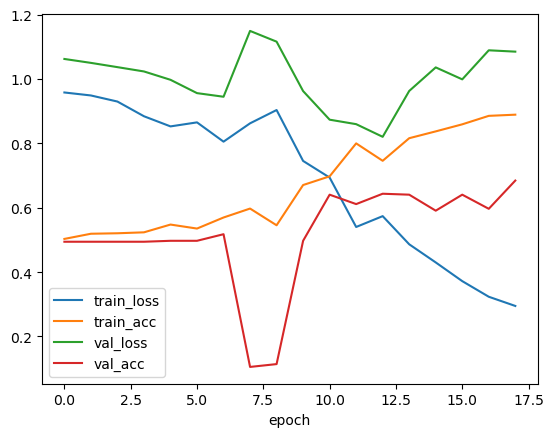

In [69]:
plt.figure()

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['accuracy'], label = 'train_acc')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['val_accuracy'], label = 'val_acc')

plt.legend()
plt.xlabel('epoch')
plt.show()

## 예측

In [70]:
# predict() 메서드로 모델 예측
y_pred = model.predict(x_test_sp)
y_pred[:10]

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step


array([[0.01698307, 0.001736  , 0.981281  ],
       [0.18059297, 0.00337689, 0.8160301 ],
       [0.84086347, 0.0015867 , 0.15754981],
       [0.9079662 , 0.00167147, 0.09036228],
       [0.91871816, 0.00215156, 0.07913028],
       [0.36774418, 0.00227702, 0.62997884],
       [0.17834565, 0.03700431, 0.78465   ],
       [0.8858727 , 0.00175025, 0.11237695],
       [0.06371612, 0.00348628, 0.9327976 ],
       [0.06292979, 0.00673673, 0.93033344]], dtype=float32)

## 평가 

In [71]:
# numpy argmax을 이용해 가장 큰 값의 인덱스들을 반환한 (클래스 예측)을 y_predict에 할당
y_predict = np.argmax(y_pred, axis = 1)
y_predict[:10]

array([2, 2, 0, 0, 0, 2, 2, 0, 2, 2], dtype=int64)

In [72]:
# numpy.argmax 를 이용해 가장 큰 값의 인덱스들을 반환한 값(클래스 예측)을 y_test_val에 할당
y_test_val = np.argmax(y_test.values, axis =  1)

In [73]:
# 실제값과 예측값을 비교하여 맞춘 값의 평균을 확인
(y_test_val == y_predict).mean()

0.6705607476635514

In [74]:
# 모델에 설정된 손실 값 및 메트릭 값을 반환하여 평가 
test_loss, test_acc = model.evaluate(x_test_sp, y_test)
test_loss, test_acc

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6520 - loss: 1.0573


(0.9891694784164429, 0.6705607771873474)